In [36]:
# Importing the Necessary Libraries

import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

In [37]:
# Importing data from google drive

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Loading datasets

product_reviews_df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')

book_reviews_df = pd.read_csv('/content/drive/MyDrive/Books_rating.csv')

In [39]:
# Displaying the first few rows of each dataset

print("Product Reviews Dataset:")

print(product_reviews_df.head())

print("\nBook Reviews Dataset:")

print(book_reviews_df.head())

Product Reviews Dataset:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the 

In [40]:
product_reviews_df.shape

(568454, 10)

In [41]:
book_reviews_df.shape

(3000000, 10)

In [42]:
product_reviews_df.isna().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [43]:
book_reviews_df.isna().sum()

,0
Id,0
Title,208
Price,2518829
User_id,561787
profileName,561905
review/helpfulness,0
review/score,0
review/time,0
review/summary,407
review/text,8


In [44]:
product_reviews_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [45]:
book_reviews_df.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [46]:
# Renaming columns for better clarity

# Product reviews dataset
product_reviews_df = product_reviews_df.rename(columns={
    'ProductId': 'Product_ID',
    'UserId': 'User_ID',
    'Score': 'Rating',
    'Time': 'Timestamp',
    'Summary': 'Review_Summary',
    'Text': 'Review_Text'
})

In [47]:
# Book reviews dataset
book_reviews_df = book_reviews_df.rename(columns={
    'User_id': 'User_ID',
    'review/score': 'Rating',
    'review/time': 'Timestamp',
    'review/summary': 'Review_Summary',
    'review/text': 'Review_Text',
    'profileName': 'Profile_Name',
    'Title': 'Book_Title',
    'Price': 'Book_Price',
    'review/helpfulness': 'Helpfulness_Rating'
})

In [48]:
# Previewing cleaned data

print("\nProcessed Product Reviews Data:")

print(product_reviews_df.head())

print("\nProcessed Book Reviews Data:")

print(book_reviews_df.head())


Processed Product Reviews Data:
   Id  Product_ID         User_ID                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Rating   Timestamp  \
0                     1                       1       5  1303862400   
1                     0                       0       1  1346976000   
2                     1                       1       4  1219017600   
3                     3                       3       2  1307923200   
4                     0                       0       5  1350777600   

          Review_Summary                                        Review_Text  
0  Good Quality Dog Food  I have bought s

In [49]:
product_reviews_df.columns

Index(['Id', 'Product_ID', 'User_ID', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Rating', 'Timestamp', 'Review_Summary',
       'Review_Text'],
      dtype='object')

In [50]:
book_reviews_df.columns

Index(['Id', 'Book_Title', 'Book_Price', 'User_ID', 'Profile_Name',
       'Helpfulness_Rating', 'Rating', 'Timestamp', 'Review_Summary',
       'Review_Text'],
      dtype='object')

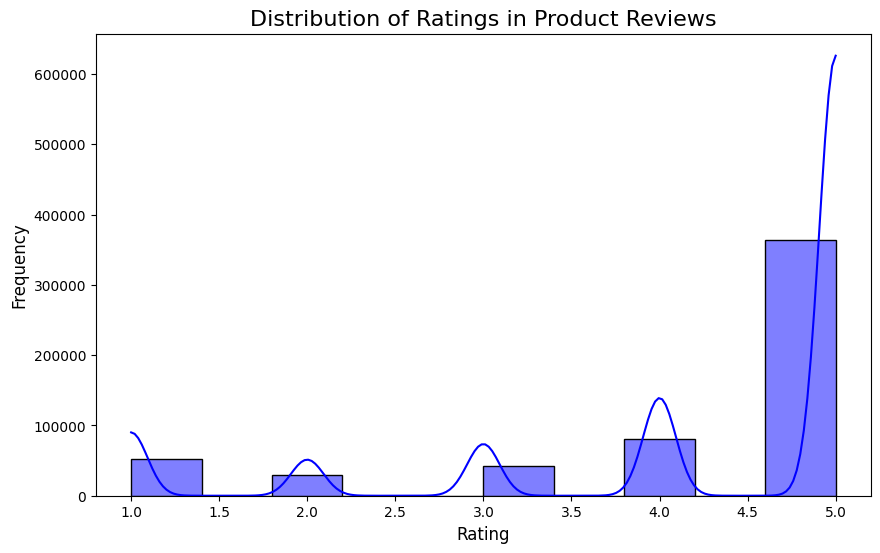

In [51]:
# Visualizing distribution of ratings for product reviews
plt.figure(figsize=(10, 6))
sns.histplot(product_reviews_df['Rating'], bins=10, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Ratings in Product Reviews', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

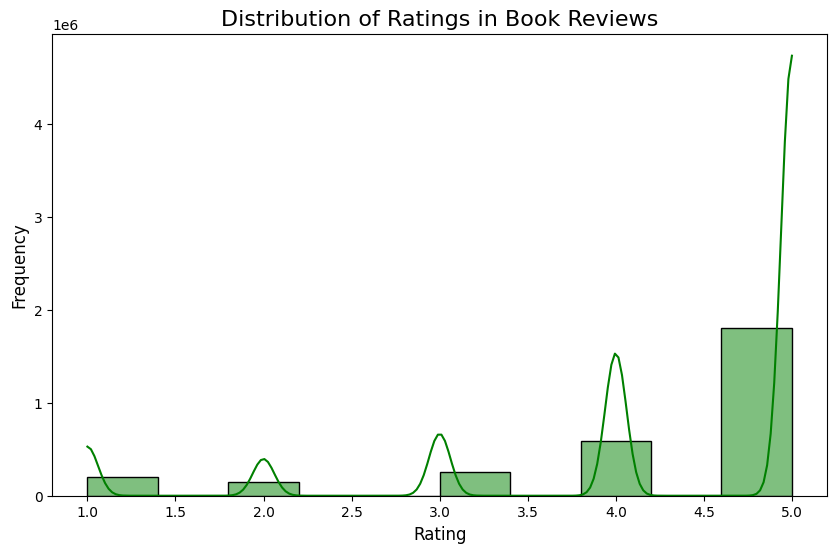

In [52]:
# Visualizing distribution of ratings for book reviews
plt.figure(figsize=(10, 6))
sns.histplot(book_reviews_df['Rating'], bins=10, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Ratings in Book Reviews', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [53]:
# Sample 0.05% of the data as the data is huge

product_reviews_df = product_reviews_df.sample(frac=0.05, random_state=42)

print(f"Sampled dataset size: {product_reviews_df.shape}")

Sampled dataset size: (28423, 10)


In [54]:
# Sample 0.005% of the data as the data is huge

book_reviews_df = book_reviews_df.sample(frac=0.005, random_state=42)

print(f"Sampled dataset size: {book_reviews_df.shape}")

Sampled dataset size: (15000, 10)


In [55]:
common_users = set(product_reviews_df['User_ID']).intersection(set(book_reviews_df['User_ID']))

# Filtering the datasets for common users

product_reviews_common = product_reviews_df[product_reviews_df['User_ID'].isin(common_users)]
book_reviews_common = book_reviews_df[book_reviews_df['User_ID'].isin(common_users)]

# Checking if the number of common users is consistent

print(f"Common users: {len(common_users)}")
print(f"Product Reviews Common size: {product_reviews_common.shape}")
print(f"Book Reviews Common size: {book_reviews_common.shape}")


Common users: 196
Product Reviews Common size: (353, 10)
Book Reviews Common size: (243, 10)


In [56]:
# Checking if the number of common users is consistent

print(f"Common users: {len(common_users)}")
print(f"Product Reviews Common size: {product_reviews_common.User_ID.nunique()}")
print(f"Book Reviews Common size: {book_reviews_common.User_ID.nunique()}")

Common users: 196
Product Reviews Common size: 196
Book Reviews Common size: 196


In [57]:
# Grouping ratings of same product by the same user by averaging the ratings per user-product pair

product_reviews_common = product_reviews_common.groupby(['User_ID', 'Product_ID']).agg({'Rating': 'mean'}).reset_index()

# Grouping ratings of same book by the same user by averaging the ratings per user-book pair
book_reviews_common = book_reviews_common.groupby(['User_ID', 'Book_Title']).agg({'Rating': 'mean'}).reset_index()


In [58]:
print(f"Product Reviews Common size: {product_reviews_common.shape}")
print(f"Book Reviews Common size: {book_reviews_common.shape}")

Product Reviews Common size: (352, 3)
Book Reviews Common size: (243, 3)


In [59]:
# Create user-product interaction matrix

product_matrix = product_reviews_common.pivot(index='User_ID', columns='Product_ID', values='Rating')

# Create user-book interaction matrix

book_matrix = book_reviews_common.pivot(index='User_ID', columns='Book_Title', values='Rating')

In [60]:
# Filling missing values with zeros

product_matrix.fillna(0, inplace=True)
book_matrix.fillna(0, inplace=True)

In [61]:
# Converting the user-item interaction matrix to a sparse matrix (CSR format)

product_sparse_matrix = csr_matrix(product_matrix)

book_sparse_matrix = csr_matrix(book_matrix)

In [62]:
# Applying SVD to the product matrix (using sparse matrix)

svd_product = TruncatedSVD(n_components=20, random_state=42)

U_product = svd_product.fit_transform(product_sparse_matrix)

sigma_product = np.diag(svd_product.singular_values_)

Vt_product = svd_product.components_

In [63]:
# Apply SVD to the book matrix (using sparse matrix)

svd_book = TruncatedSVD(n_components=20, random_state=42)

U_book = svd_book.fit_transform(book_sparse_matrix)

sigma_book = np.diag(svd_book.singular_values_)

Vt_book = svd_book.components_

In [64]:
# Predicting ratings for products (after applying SVD)
product_pred = np.dot(np.dot(U_product, sigma_product), Vt_product)

# Predicting ratings for books (after applying SVD)
book_pred = np.dot(np.dot(U_book, sigma_book), Vt_book)

In [65]:
# Create a mapping from book indices to book titles
book_idx_to_title = {idx: title for idx, title in enumerate(book_matrix.columns)}

# showing mapping
print(book_idx_to_title)

{0: '1st to Die: A Novel', 1: 'A Christmas Carol (Classic Fiction)', 2: "A Connecticut Yankee in King Arthur's Court", 3: "A Connecticut Yankee in King Arthur's Court (Mark Twain Library)", 4: 'A Death in the Family', 5: 'A Journey to the Center of the Earth', 6: 'A Life God Rewards: Why Everything You Do Today Matters Forever', 7: 'A Perfect Scoundrel (Lords of Love)', 8: 'A Portrait of the Artist As a Young Man', 9: 'A Room with a View (Penguin Readers, Level 6)', 10: 'A visit from Santa Claus', 11: "Alfred Hitchcock's Ghostly Gallery", 12: "Alice's Adventures in Wonderland (Aladdin Classics)", 13: "Alice's Adventures in Wonderland and Through the Looking Glass", 14: "Alice's Adventures in Wonderland and Through the Looking Glass (Classic Collection)", 15: 'All Creatures Great and Small', 16: 'American Ways: A Guide for Foreigners in the United States', 17: 'Angels in America, Part One: Millennium Approaches', 18: 'Animal Farm (Signet Classics, CT304)', 19: 'Appointment with Death (A

In [66]:
def recommend_books_for_product(user_id, n_recommendations=5):
    """
    Recommend books for a user based on their ratings of products.
    The recommendation is based on the predicted ratings for books, aggregated across top products.
    """
    # Retrieve the predicted ratings for all products for the user
    user_product_ratings = product_pred[user_id]

    # Retrieve indices of the top N product ratings (most preferred products)
    top_product_indices = np.argsort(user_product_ratings)[::-1][:n_recommendations]

    # Aggregate predicted ratings for books across the top products
    product_to_books_ratings = np.sum(np.dot(U_product[top_product_indices], Vt_book), axis=0)

    # Retrieve indices of the top N books with the highest aggregated scores
    top_book_indices = np.argsort(product_to_books_ratings)[::-1][:n_recommendations]

    # Retrieve the titles for the recommended books
    recommended_books_titles = [book_idx_to_title[idx] for idx in top_book_indices]

    return recommended_books_titles

In [67]:
# Test the recommendation functions

user_id = 7

top_n = 5

# Retrieving recommended books based on product preferences

recommended_books = recommend_books_for_product(user_id, n_recommendations=top_n)

print(f"Top {top_n} Books for User {user_id} based on Product Preferences: {recommended_books}")

Top 5 Books for User 7 based on Product Preferences: ['The ABC Murders', 'The Murder of Roger Ackroyd', 'A Christmas Carol (Classic Fiction)', 'Poky Little Puppy', 'Jonathan Livingston Seagull (20th Anniversary Ed.)']


In [68]:
def recommend_products_for_book(user_id, n_recommendations=5):
    """
    Recommend products for a user based on their ratings of books.
    Provides a single consolidated list of recommended products.
    """
    # Predicted ratings for all books for the given user
    user_book_ratings = book_pred[user_id]

    # Top N books based on predicted ratings
    top_book_indices = np.argsort(user_book_ratings)[::-1][:n_recommendations]

    # Aggregate predicted ratings for products across the top books
    book_to_products_ratings = np.sum(np.dot(U_book[top_book_indices], Vt_product), axis=0)

    # Top N products with the highest aggregated scores
    top_product_indices = np.argsort(book_to_products_ratings)[::-1][:n_recommendations]

    # Retrieve the product IDs for the recommended products
    recommended_product_ids = [product_matrix.columns[idx] for idx in top_product_indices]

    return recommended_product_ids

In [69]:
# Retrieving recommended products based on book preferences

recommended_products = recommend_products_for_book(user_id, n_recommendations=top_n)

print(f"Top {top_n} Products for User {user_id} based on Book Preferences: {recommended_products}")

Top 5 Products for User 7 based on Book Preferences: ['B000LKXRV8', 'B0017SWAAW', 'B004GU3YXU', 'B005VGZ49U', 'B001EPQMU2']


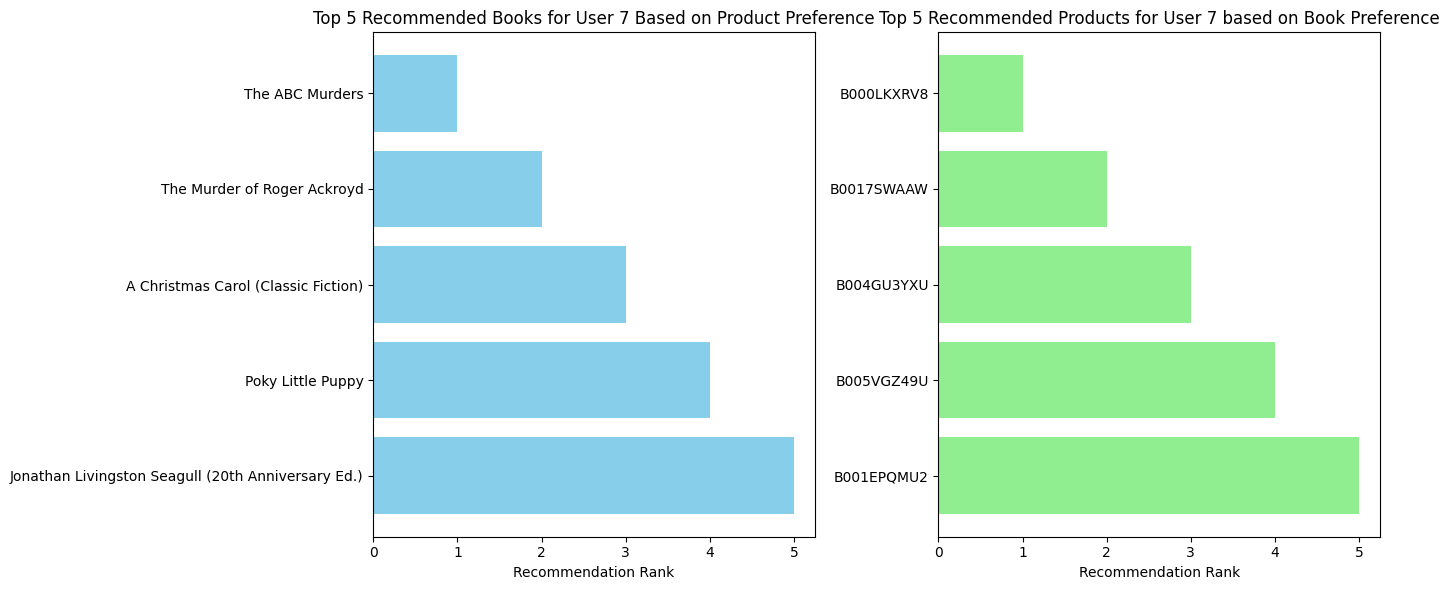

In [71]:
def plot_recommendations(user_id, top_n=5):
    """
    Plot bar charts showing the top recommended books and products for a given user.

    Parameters:
        user_id (int): The ID of the user for whom recommendations are generated.
        top_n (int): Number of top recommendations to display.
    """
   # Retrieving recommended books based on product preferences (limit to top_n)
    recommended_books = recommend_books_for_product(user_id, n_recommendations=top_n)

    # Retrieving recommended products based on book preferences (limit to top_n)
    recommended_products = recommend_products_for_book(user_id, n_recommendations=top_n)

    # Flatten the lists of recommended books and products (consider only top_n items)
    recommended_books_flat = [item for sublist in recommended_books for item in sublist][:top_n]
    recommended_products_flat = [item for sublist in recommended_products for item in sublist][:top_n]


    # Create bar plots for recommended books and products
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Bar plot for recommended books (top_n only)
    axes[0].barh(recommended_books_flat,range(1, len(recommended_books_flat) + 1), color='skyblue')
    axes[0].set_yticks(range(len(recommended_books)))
    axes[0].set_yticklabels(recommended_books)
    axes[0].set_title(f"Top {top_n} Recommended Books for User {user_id} Based on Product Preference")
    axes[0].set_xlabel('Recommendation Rank')
    axes[0].invert_yaxis()  # Highest-ranked book at the top

    # Bar plot for recommended products (top_n only)
    axes[1].barh(recommended_books_flat, range(1, len(recommended_books_flat) + 1), color='lightgreen')
    axes[1].set_yticks(range(len(recommended_products)))
    axes[1].set_yticklabels(recommended_products)
    axes[1].set_title(f"Top {top_n} Recommended Products for User {user_id} based on Book Preference")
    axes[1].set_xlabel('Recommendation Rank')
    axes[1].invert_yaxis()  # Highest-ranked product at the top

    plt.tight_layout()
    plt.show()

# Test the plot function with a specific user_id and number of recommendations
plot_recommendations(user_id=7, top_n=5)
